In [1]:
from os import path 

from cv2 import resize
from keras.layers import Input
from keras.models import Model

import matplotlib.pylab as plt
import numpy as np

import blusky.datasets as datasets
from blusky.transforms.transform_factories_2d import vanilla_scattering_transform

from blusky.transforms.apply_father_wavelet_2d import ApplyFatherWavlet2D
from blusky.transforms.cascade_2d import Cascade2D
from blusky.transforms.cascade_tree import CascadeTree
from blusky.transforms.default_decimation import DefaultDecimation
from blusky.utils.pad_2d import Pad2D, pad_to_log2
from blusky.wavelets.wavelet_factories_2d import vanilla_gabor_2d, vanilla_morlet_2d

Using TensorFlow backend.


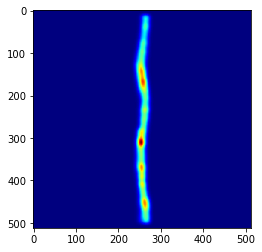

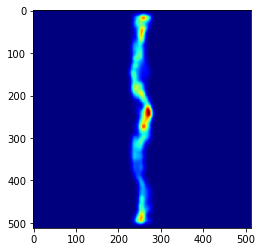

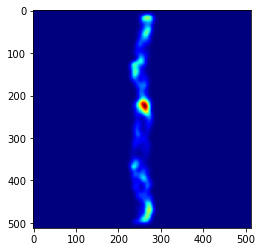

In [2]:
N = 512

img = np.empty((4,N,N,1))

# load the arX test data
for i, filename in enumerate(["ar4p5.dat", "ar6.dat", "ar9.dat"]):
    data = np.ascontiguousarray(np.loadtxt(filename).astype(np.float32))
    data = data.reshape((1000,600))
    data /= data.max()

    data = resize(data,(N,N))[::-1,:]
    img[i,:,:,0] = data

    plt.figure()
    plt.imshow(img[i,:,:,0], cmap='jet')
    plt.show()
     
# add a dirac delta for normalization
img[3,:,:,0] = np.zeros((N,N))
img[3,N//2-1:N//2+2, N//2-1:N//2+2,0] = 1

In [3]:
model, viz = vanilla_scattering_transform(7, img.shape[1:], 0.004, order=3)
model.summary()



Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 1)  0                                            
__________________________________________________________________________________________________
reflection_padding2d_1 (Reflect (None, 1024, 1024, 1 0           input_1[0][0]                    
__________________________________________________________________________________________________
depthwise_conv2d_1 (DepthwiseCo (None, 512, 512, 9)  2034        reflection_padding2d_1[0][0]     
__________________________________________________________________________________________________
depthwise_conv2d_2 (DepthwiseCo (None, 512, 512, 9)  20

In [4]:
from time import time
st = time()
result = model.predict(img)
print (time()-st)




331.0184519290924


In [5]:
dirac_norm = [i[-1] for i in result]
maxval = max([np.max(i) for i in dirac_norm])
dirac_norm = [i/maxval for i in dirac_norm]

_result = [k[0,0,:]/j[0,0,:] for i,j in zip(result,dirac_norm) for k in i[:-1]]
# reduce to coefficient vectors:
coeffs = [np.hstack(_result[i::3]) for i in range(img.shape[0]-1)]

In [6]:
# shoud be same
len(viz.plot_elements), len(coeffs[0])

(15849, 15849)

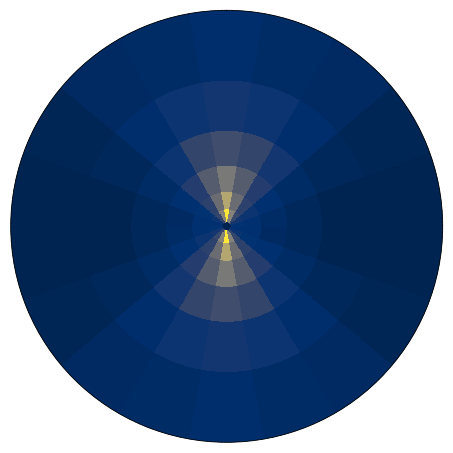

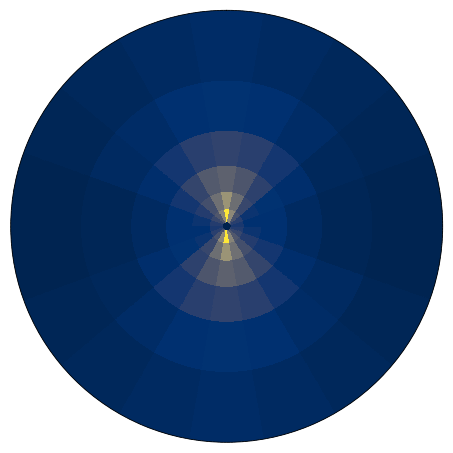

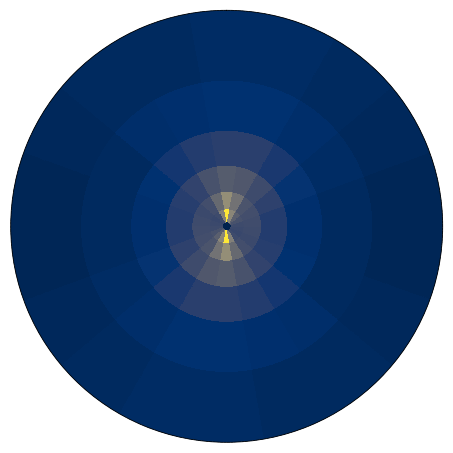

In [7]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_axes([0,0,1,1], polar=True)
ax1 = viz.plot(coeffs[0], ax1, 1)
plt.show()

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_axes([0,0,1,1], polar=True)
ax1 = viz.plot(coeffs[1], ax1, 1)
plt.show()

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_axes([0,0,1,1], polar=True)
ax1 = viz.plot(coeffs[2], ax1, 1)
plt.show()

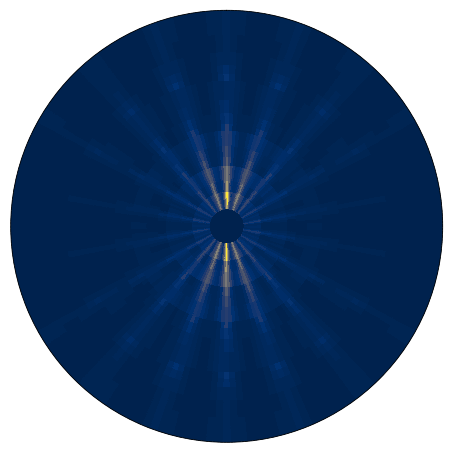

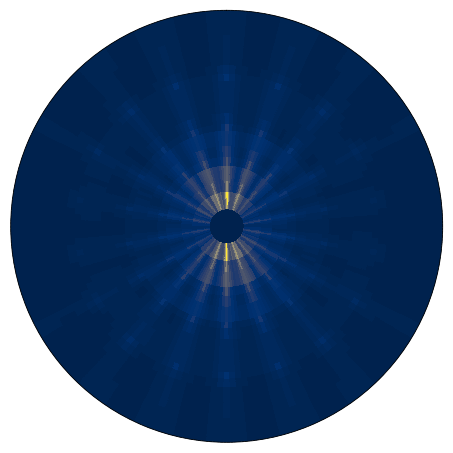

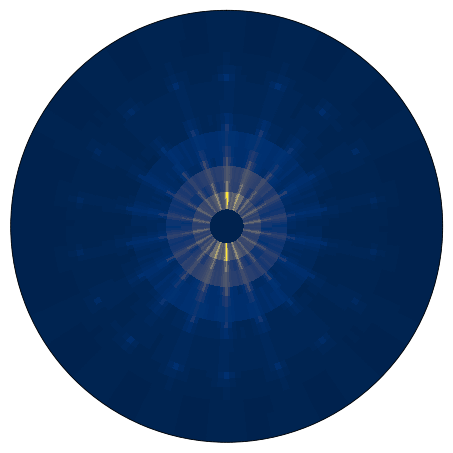

In [8]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_axes([0,0,1,1], polar=True)
ax1 = viz.plot(coeffs[0], ax1, 2)
plt.show()

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_axes([0,0,1,1], polar=True)
ax1 = viz.plot(coeffs[1], ax1, 2)
plt.show()

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_axes([0,0,1,1], polar=True)
ax1 = viz.plot(coeffs[2], ax1, 2)
plt.show()

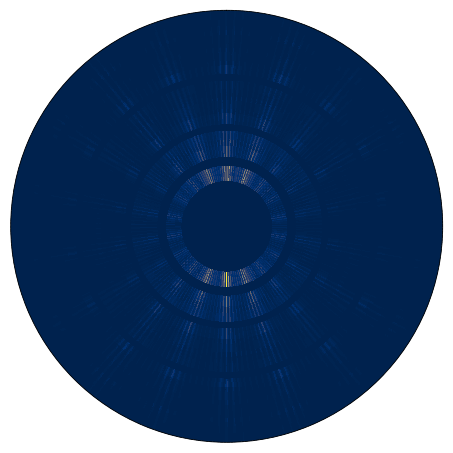

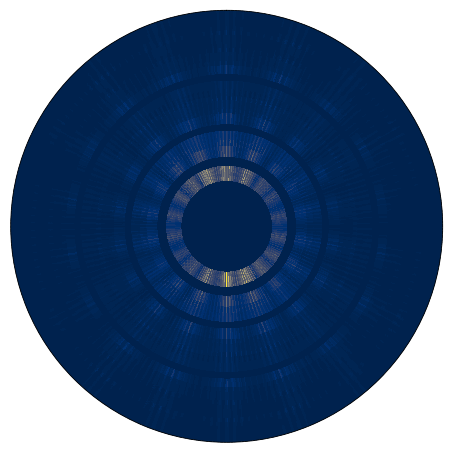

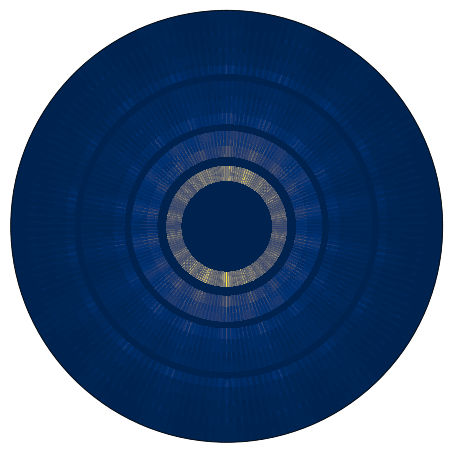

In [9]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_axes([0,0,1,1], polar=True)
ax1 = viz.plot(coeffs[0], ax1, 3)
plt.show()

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_axes([0,0,1,1], polar=True)
ax1 = viz.plot(coeffs[1], ax1, 3)
plt.show()

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_axes([0,0,1,1], polar=True)
ax1 = viz.plot(coeffs[2], ax1, 3)
plt.show()